In [3]:
import pydot
from IPython.display import Image, display, HTML
import queue
import numpy as np
import base64
import heapq

## Clase Node (Representa los Nodos del Árbol de Búsqueda)

Esta clase, es una clase general para represetar el problema y a la vez los nodos de un árbol.

Para un problema específico se creará una clase que herede de esta.

**Atributos:**

- state: estado del nodo, que en dependencia del problema debe tener una representación específica
- value: este atributo puede servir para darle un valor(id) que identifique a cada nodo (Color)
- children: es un arreglo de los nodos hijos
- parent: El padre, o sea, el nodo que lo generó
- operator: El operador que lo generó
- operators: Los posibles operadores a aplicar (aunque en este caso, para saber el número del operdor, es una lista con todos los operados)
- objective: estado objetivo a llegar
- level: El nivel de profundidad del nodo, en el árbol

**Métodos:**

- **add_child:** Que adiciona un hijo en la lista children, en este caso se pasan los parámetros del nodo, éste se crea y se adiciona a la lista.

- **add_node_child:** Parecido al anterior, sólo que se pasa como parámetro el nodo ya creado y sólo se adiciona a la lista children.

- **getchildrens:** Método que devuelve la lista de hijos al aplicar los operadores.

- **getState:** Método abstracto que deben implementar los problemas que hereden de Node, para definir lo que hace cada uno de los operadores. Este método devuelve el estado que se obtiene al aplicar el operador en la posición index del arreglo operators.

- **repeatStatePath:** Este método devuelve un booleano en dependencia de si el estado que se pasa está ya en el camino a la raíz. Verdadero si está, Falso sin no está. Esto es para evitar ciclos y caminos infinitos.

- **pathObjective:** Este método devuelve el camino hasta la raíz. Útil para buscar el camino cuando se encuentra el estado objetivo.

- **printPath:** Este método imprime la solución. Puede sobreescribirse en las clases que hereden de esta para imprimir la solución como se desee.

- **cost:** Este método también debe definirse en las clases que hereden de ésta, definiendo el costo de cada operador para generar un nuevo estado.

- **f:** Esta es la función f usada en el algoritmo A* que es la suma del costo y la heurística (cost + heuristic). Acá por estar sólo en los métodos a ciegas será igual al costo.

In [4]:
class Node ():
    def __init__(self, state,value,operators, operator=None, parent=None,objective=None):
        self.state= state
        self.value = value
        self.children = []
        self.parent=parent
        self.operator=operator
        self.operators=operators
        self.objective=objective
        self.level=0

    def add_child(self, value, state, operator):
        node=type(self)(value=value, state=state, operator=operator,parent=self, operators=self.operators)
        node.level=node.parent.level+1
        self.children.append(node)
        return node

    def add_node_child(self, node):
        node.level=node.parent.level+1
        self.children.append(node)
        return node

    #Devuelve todos los estados según los operadores aplicados
    def getchildrens(self):
        return [
            self.getState(i)
            if not self.repeatStatePath(self.getState(i))
                else None for i, op in enumerate(operators)]
    
    def heuristic(self):
        value_1 = abs(endState[0] - self.state[0])
        value_2 = abs(endState[1] - self.state[1])
        return value_1 + value_2

    def getState(self, index):
        pass

    def __eq__(self, other):
        return self.state == other.state

    def __lt__(self, other):
        return self.f() < other.f()


    def repeatStatePath(self, state):
        n=self
        while n is not None and n.state!=state:
            n=n.parent
        return n is not None

    def pathObjective(self):
        n=self
        result=[]
        while n is not None:
            result.append(n)
            n=n.parent
        return result

    def printPath(self):
        stack=self.pathObjective()
        while len(stack)!=0:
            node=stack.pop()
            if node.operator is not None:
                print(f'operador:  {operators[node.operator]} \t estado: {node.state}')
            else:
                print(f' {node.state}')

    def cost(self):
        return 1

    def f(self):
        return self.cost()

## Búsqueda Primero a lo Ancho

In [5]:
def breadthFirst(root, endState):
    pq=queue.Queue()
    pq.put(root) # Se adiccionan elementos a la cola
    while not pq.empty():
      node=pq.get() # Se obtiene el primer elemento de la cola
      children=node.getchildrens() # Se obtienen los hijos del nodo actual (El que se acaba de sacar)
      for i,child in enumerate(children): # Se itera sobre los hijos
        if child is not None: # Si el hijo no es None, significa que se ha podido generar un nuevo estado
          newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
          pq.put(newChild)
          if endState==child:
            return (root, newChild)

## Búsqueda Primero en Profundidad

In [6]:
def depthFirst(root, endState):
    pq=[]
    pq.append(root)
    while len(pq)>0:
        node=pq.pop()
        children=node.getchildrens()       
        for i,child in enumerate(children):
            if child is not None:
                newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
                if endState==child:
                    return (root, newChild)
                pq.append(newChild) # Se añade únicamente el primer hijo a la lista de prioridad
                break

In [7]:
def depthFirst(root, endState):
    wl=[] # Waitlist
    pq=[]
    pq.append(root)
    while len(pq)>0 or wl:
        if len(pq) == 0 and wl: # Si ya se recorrió toda la lista de prioridad, se extraé de la lista de espera los últimos hermanos almacenados
            next_siblings = wl.pop(0)
            pq.append(next_siblings.pop(0)) # Se extrae el primer hermano de la lista de espera
            if next_siblings: # Si quedan hermanos, se vuelven a añadir a la lista de espera
                wl.append(next_siblings)
        
        siblings = []
        contador = 0
        node=pq.pop()
        children=node.getchildrens()
        
        for i,child in enumerate(children):
            if child is not None:
                newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
                if contador >= 1:
                    siblings.append(newChild) # Se añaden los demás hijos a una lista
                else:
                    pq.append(newChild) # Se añade únicamente el primer hijo a la lista de prioridad
                contador += 1
                if endState==child:
                    return (root, newChild)
        
        if siblings:
            wl.append(siblings) # Se añade una lista de espera con los hermanos restantes
        

# Best-First

In [8]:
def heuristic(node, endState):
    return np.linalg.norm(np.array(node.state) - np.array(endState)) # Linalg -> Calcula la distancia euclidiana entre dos puntos

def bestFirst(root, endState):
    pq=[]
    pq.append(root)
    while len(pq)>0:
        h = []
        newChilds = []
        node=pq.pop()
        children=node.getchildrens()       
        for i,child in enumerate(children):
            if child is not None:
                newChild=node.add_child(value=node.value+'-'+str(i), state=child, operator=i)
                h.append(heuristic(newChild, endState)) # Se calcula la heurística para cada hijo
                newChilds.append(newChild)
                if endState==child:
                    return (root, newChild)
        if len(h) > 0:
            min_index = h.index(min(h))
            pq.append(newChilds[min_index]) # Se añade el hijo con la menor heurística a la lista de prioridad

# A*

In [17]:
def heuristicAStar(node, endState):
    return node.cost() + np.linalg.norm(np.array(node.state) - np.array(endState)) # f(n) = g(n) + h(n), donde g(n) es el coste del nodo y h(n) es la heurística

def aStar(root, endState):
    pq = []
    heapq.heappush(pq, (heuristicAStar(root, endState), root)) # (priority queue, (heuristic, node))
    while pq:
        _, node = heapq.heappop(pq) # Se extrae el nodo con la menor heurística
        children = node.getchildrens()
        for i, child_state in enumerate(children):
            if child_state is not None:
                new_child = node.add_child(value=node.value + '-' + str(i), state=child_state, operator=i)
                f = heuristicAStar(new_child, endState) # (priority queue, (heuristic, node))
                heapq.heappush(pq, (f, new_child))
                if endState == child_state:
                    return (root, new_child)

## Gráficos

In [10]:
def draw(root,path):
    graph = pydot.Dot(graph_type='graph')
    nodeGraph=pydot.Node(str(root.state)+"-"+str(0),
                         label=str(root.state),shape ="circle",
                         style="filled", fillcolor="red")
    graph.add_node(nodeGraph)
    path.pop()
    return drawTreeRec(root,nodeGraph,graph,0,path.pop(),path)

def drawTreeRec(root,rootGraph,graph,i,topPath,path):
    if root is not None:
      children=root.children
      for j,child in enumerate(children):
        i=i+1
        color="white"
        if topPath.value==child.value:
          if len(path)>0:topPath=path.pop()
          color='red'
        c=pydot.Node(child.value,label=str(child.state)+r"\n"+r"\n"+"f="+str(child.f()),
                     shape ="circle", style="filled",
                     fillcolor=color)
        graph.add_node(c)
        graph.add_edge(pydot.Edge(rootGraph, c,
                                  label=str(child.operator)+'('+str(child.cost())+')'))
        graph=drawTreeRec(child,c,graph,i,topPath,path)
      return graph
    else:
      return graph

## Ejemplo

In [11]:

class Jarra(Node):

  def getState(self, index):
    state=self.state
    nextState=None
    if index==0:
      if state[0]<3:
        nextState=[3,state[1]]
      else:
        nextState=None
    elif index==1:
      if state[1]<4:
        nextState=[state[0],4]
      else:
        nextState=None
    elif index==2:
      if state[0]>0:
        nextState=[0,state[1]]
      else:
        nextState=None
    elif index==3:
      if state[1]>0:
        nextState=[state[0],0]
      else:
        nextState=None
    elif index==4: nextState=self.trasvasar3L4L(state)
    elif index==5: nextState=self.trasvasar4L3L(state)
    return nextState if state!=nextState else None

  def trasvasar4L3L(self, state):
    t=min(3-state[0],state[1])
    return [state[0]+t,state[1]-t]

  def trasvasar3L4L(self, state):
    t=min(state[0],4-state[1])
    return [state[0]-t,state[1]+t]

  #Costo acumulativo(valor 1 en cada nivel)
  def cost(self):
    return self.level

In [12]:
operators=['0- llenar jarra de 3 litros','1- llenar jarra de 4 litros',
           '2- vaciar jarra de 3 litros',
           '3- vaciar jarra de 4 litros',
           '4- trasvasar de 3-4',
           '5- trasvasar de 4-3']
initState=[0,0]
endState=[0,2]

### Best-First

 [0, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [0, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 1]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 1]
operador:  5- trasvasar de 4-3 	 estado: [1, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [1, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 2]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 2]


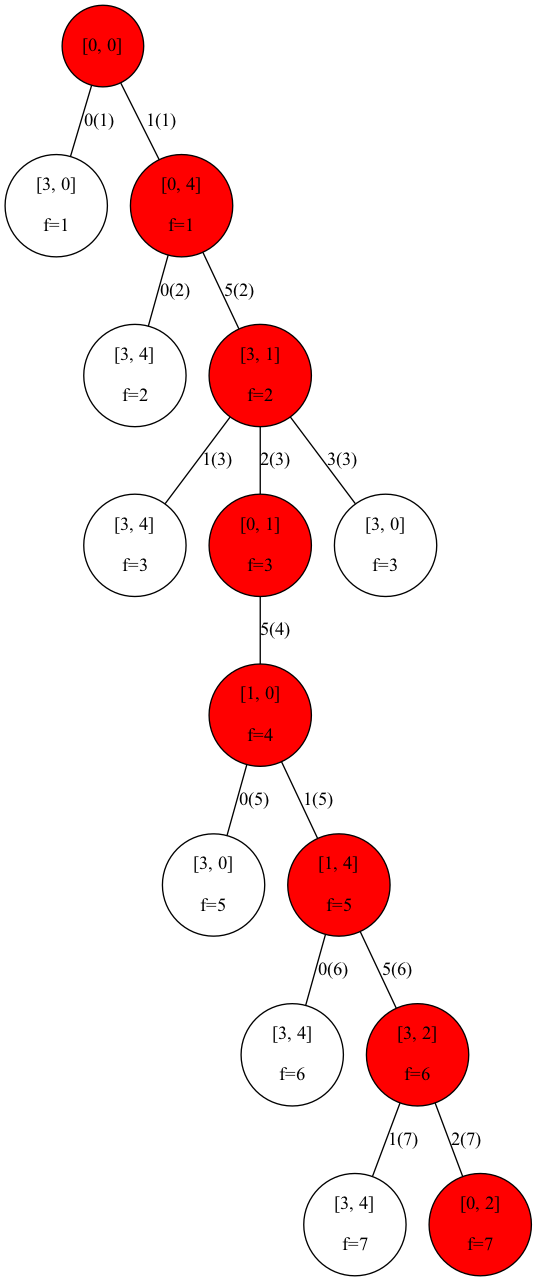

In [13]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=bestFirst(jarra,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)

### Búsqueda a ciegas a lo ancho

 [0, 0]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 3]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 3]
operador:  4- trasvasar de 3-4 	 estado: [2, 4]
operador:  3- vaciar jarra de 4 litros 	 estado: [2, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 2]


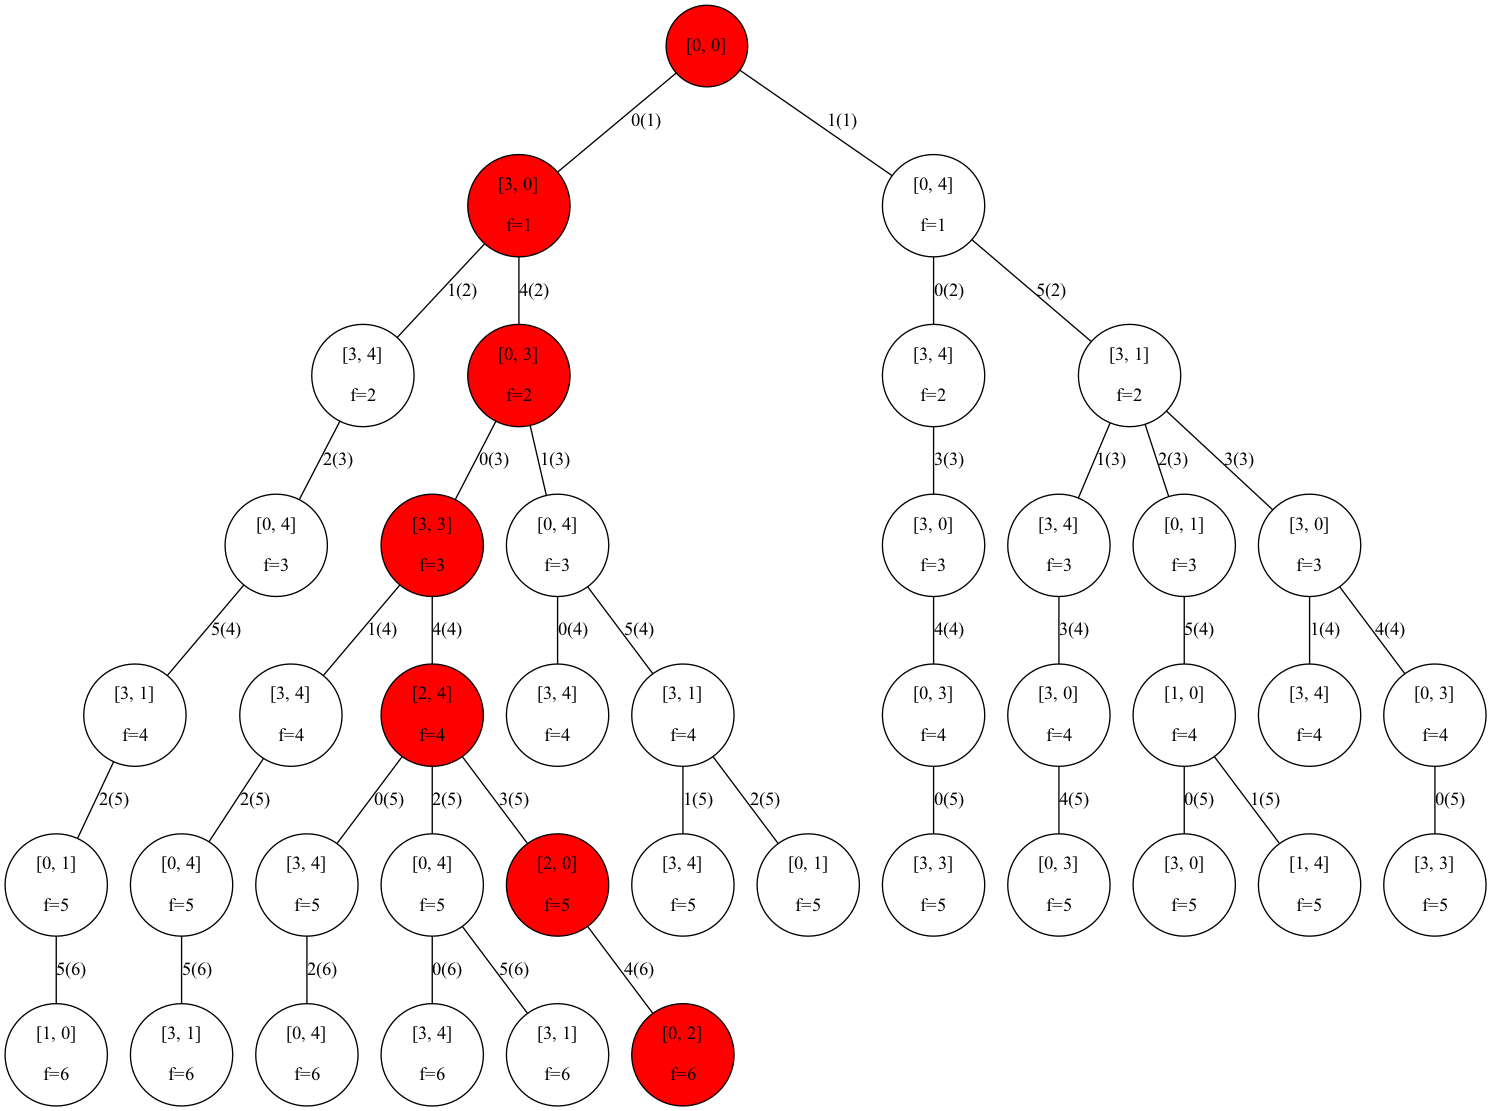

In [14]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=breadthFirst(jarra,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)

### Búsqueda a ciegas de profundidad

 [0, 0]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [3, 4]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 1]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 1]
operador:  5- trasvasar de 4-3 	 estado: [1, 0]
operador:  1- llenar jarra de 4 litros 	 estado: [1, 4]
operador:  5- trasvasar de 4-3 	 estado: [3, 2]
operador:  2- vaciar jarra de 3 litros 	 estado: [0, 2]


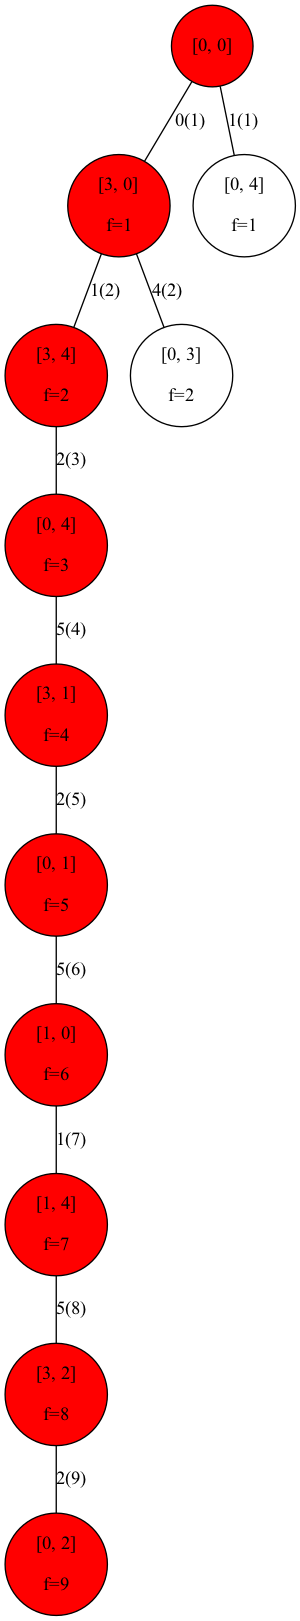

In [15]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=depthFirst(jarra,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)

### A*

 [0, 0]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 3]
operador:  0- llenar jarra de 3 litros 	 estado: [3, 3]
operador:  4- trasvasar de 3-4 	 estado: [2, 4]
operador:  3- vaciar jarra de 4 litros 	 estado: [2, 0]
operador:  4- trasvasar de 3-4 	 estado: [0, 2]


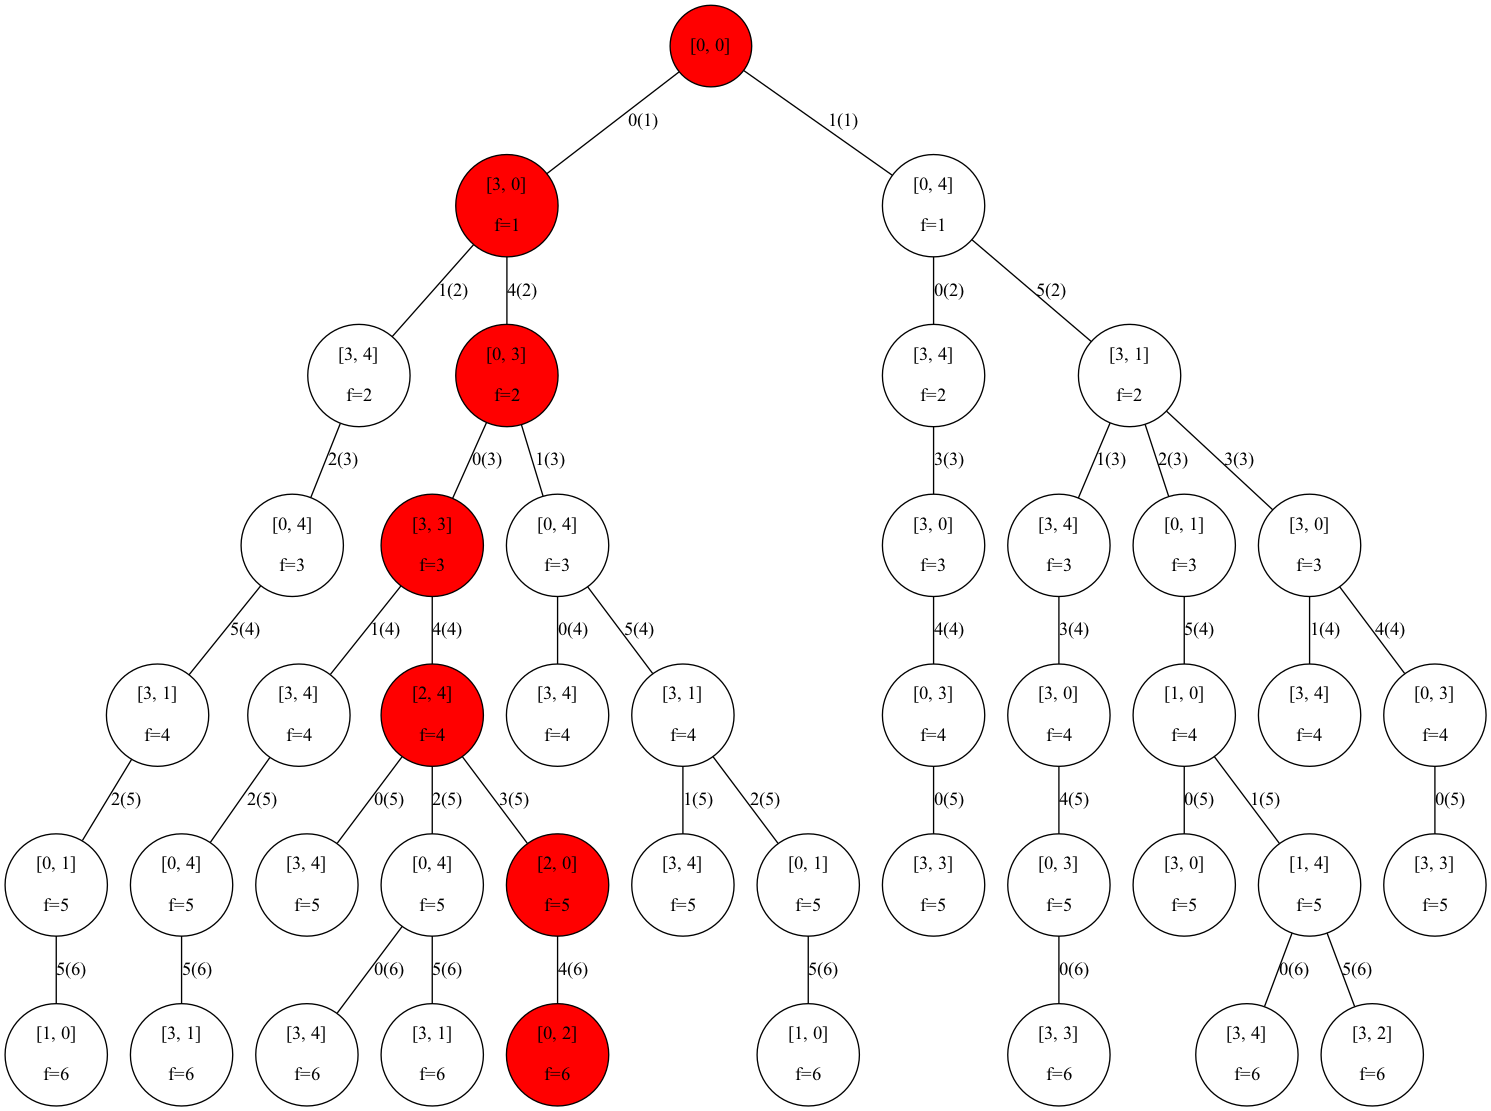

In [18]:
jarra=Jarra(value="inicio",state=initState,operators=operators)
(tree, objective)=aStar(jarra,endState)
path=objective.pathObjective()
objective.printPath()
graph=draw(tree, path)
tree_image = Image(graph.create_png(), width=900, height=700)
display(tree_image)